<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Feature Scaling

Continuando con nuestro proyecto en AutoRenew, la empresa de coches de segunda mano, en este laboratorio abordarás una fase crucial del preprocesamiento de datos: el **Feature Scaling**. Este paso es esencial para asegurar que todas las características (variables) de los coches se encuentren en la misma escala antes de entrenar los modelos de Machine Learning. Esto evitará que algunas características dominen sobre otras debido a sus rangos de valores diferentes, mejorando así la precisión del modelo predictivo que estás desarrollando.

Tu tarea en este laboratorio es aplicar técnicas de Feature Scaling a las características del conjunto de datos que consideres relevantes. Este paso es fundamental para preparar los datos de manera adecuada para el entrenamiento de modelos de Machine Learning, lo que haremos en los próximos ejercicios.

**Columnas del conjunto de datos que podrías escalar:**

- **price**: Precio del coche.

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **kilometer**: Kilometraje total del coche.

- **yearOfRegistration**: Año de registro del coche (aunque es una característica temporal, en algunos casos puede necesitar escalado dependiendo del enfoque del modelo).

- **monthOfRegistration**: Mes de registro del coche.

**Instrucciones:**

1. **Identificación de las características a escalar:** Revisa el conjunto de datos y selecciona las columnas que deberían ser escaladas. Estas generalmente incluyen características numéricas continuas como el precio, la potencia y el kilometraje.

2. **Aplicación de técnicas de Feature Scaling**


3. **Comparación de resultados:** Después de aplicar el escalado, observa cómo han cambiado las distribuciones de las características. Evalúa cuál de las técnicas de escalado es más apropiada para este conjunto de datos y justifica tu elección.

**Nota:** Este laboratorio se construye sobre el análisis exploratorio y la gestión de nulos que realizaste anteriormente. Asegúrate de mantener una buena documentación de tus procesos, ya que utilizaremos estos datos escalados en las próximas etapas de modelado de Machine Learning.


In [2]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../datos/df_gestion_nulos.csv", index_col=0)

Eliminamos la columna de postal code ya que no es necesaria:

In [4]:
df.drop(columns="postalCode", inplace=True)

In [5]:
df.dtypes

dateCrawled             object
name                    object
seller                  object
offerType               object
price                    int64
abtest                  object
vehicleType             object
gearbox                 object
powerCV                float64
model                   object
kilometer              float64
monthOfRegistration     object
fuelType                object
brand                   object
notRepairedDamage       object
dateCreated             object
lastSeen                object
tipo_coche              object
dtype: object

Tenemos tres variables numéricas: price, powerCV y kilometer. Ninguna es una normal perfecta y tenemos bastantes outlayers por lo que vamos a probar los algoritmos de RobustScaler y StandardScaler.

In [6]:
escalador_robust = RobustScaler()
datos_transf_robust = escalador_robust.fit_transform(df[["powerCV", "kilometer"]])
df[["powerCV_robust", "kilometer_robust"]] = datos_transf_robust


escalador_estandar = StandardScaler()
datos_transf_estandar = escalador_estandar.fit_transform(df[["powerCV", "kilometer"]])
df[["powerCV_standar", "kilometer_standar"]] = datos_transf_estandar

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,359184.0,5.579109e+03,6683.597445,1.000000,1250.000000,3000.000000,7350.000000,50000.000000
powerCV,359184.0,1.240431e+02,56.619404,40.000000,87.000000,120.000000,148.000000,998.000000
kilometer,359184.0,1.259598e+05,39542.345895,5000.000000,125000.000000,150000.000000,150000.000000,150000.000000
powerCV_robust,359184.0,6.628072e-02,0.928187,-1.311475,-0.540984,0.000000,0.459016,14.393443
kilometer_robust,359184.0,-9.616074e-01,1.581694,-5.800000,-1.000000,0.000000,0.000000,0.000000
powerCV_standar,359184.0,-2.541411e-16,1.000001,-1.484354,-0.654249,-0.071409,0.423122,15.435664
kilometer_standar,359184.0,4.898057e-17,1.000001,-3.058999,-0.024273,0.607961,0.607961,0.607961


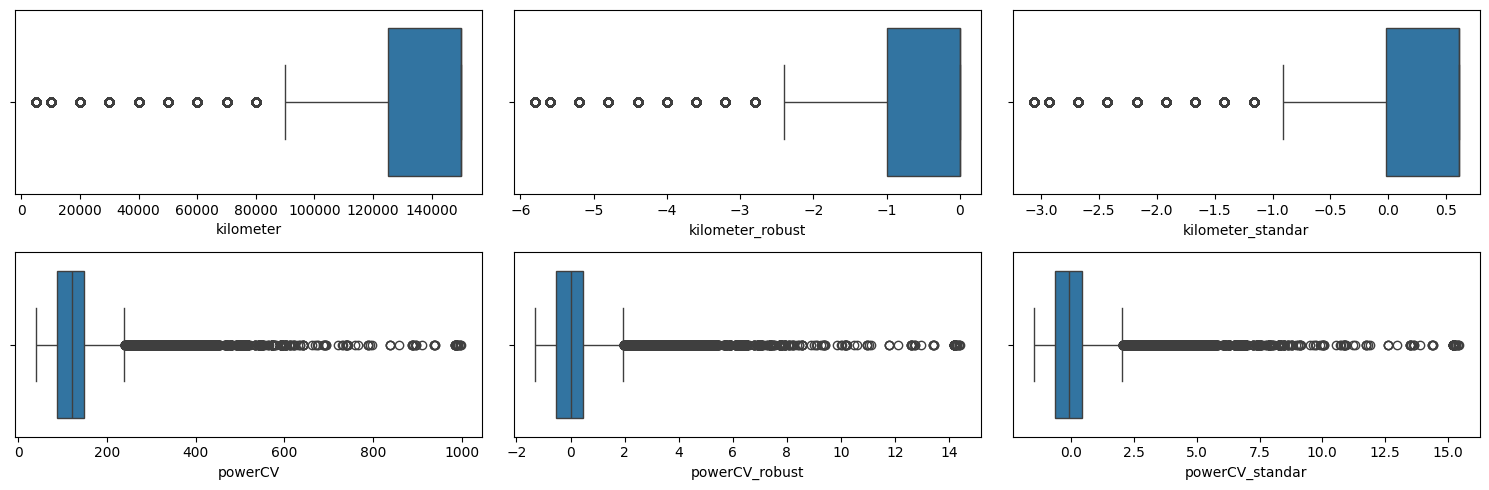

In [8]:
fig , axes = plt.subplots(nrows=2 , ncols=3, figsize = (15, 5))

axes = axes.flat
sns.boxplot(x = "kilometer", data = df, ax = axes[0])
sns.boxplot(x = "kilometer_robust", data = df, ax = axes[1])
sns.boxplot(x = "kilometer_standar", data = df, ax = axes[2])

sns.boxplot(x = "powerCV", data = df, ax = axes[3])
sns.boxplot(x = "powerCV_robust", data = df, ax = axes[4])
sns.boxplot(x = "powerCV_standar", data = df, ax = axes[5])

plt.tight_layout()

Observando las escalas para ambas columnas numéricas tanto con el robust como con el estándar podemos observar que no hay muchas diferencias. En cuanto a kilómetros, para ambos la media y mediana está rondando el 0, sin embargo, para el escalado robusto están más cerca la media y mediana. Además, para ambos algoritmos a partir de la mediana todos tienen los mismos datos siguiendo el ejemplo de la variable original. En cuanto a powerCV de nuevo media y mediana de ambos escalados está muy cerca de cero, sin embargo, para la robusta la media y mediana se acerca más, además para ambas los máximos y mínimos son muy parecidos. Por lo tanto, es complicado elegir entre una y otra pues sus métricas se parecen bastante, sin embargo, usaría la robusta pues parece que en los kilómetros capan a patir de 150000 y aunque un coche tuviera más kilometros pondrían igualmente 150000. Lo que implica que otros kilometrajes reales recogidos se conviertan en outlayers, pero si que hay que darles importancia a estos outlayers y el escalado robusto los tiene más en cuenta que el estandar. 

Nos creamos un nuevo dataframe con las columnas del original pero en vez de powerCV y kilometer, nos quedamos con la opción robusta tras la estandarización.

In [16]:
df_estandarizado = df[['dateCrawled', 'name', 'seller', 'offerType', 'abtest', 'vehicleType', 'gearbox', 'model', 'price',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage', 'dateCreated', 'lastSeen', 'tipo_coche', 'powerCV_robust', 'kilometer_robust']]

In [17]:
df_estandarizado.to_csv("../datos/df_estandarizado.csv")